# Feladatok a lineáris rendszerek témaköréből

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [307]:
from scipy import signal
from scipy.fftpack import fft, ifft

## 1. feladat

Diszkrét idejű lineáris időinvariáns rendszer stabilitásának szükséges és elégséges feltétele, hogy a $Z$-transzformált pólusai az egységkörön belül helyezkedjenek el.

Tekintsük az alábbi két rendszert:
$$G_a[z] = \frac{3z}{(z - 0.5)(z + 0.5)}$$
$$G_b[z] = \frac{z}{(z - 1.5)(z − 0.5)}$$

* Állapítsa meg a rendszerek egységimpulzusra adott válaszait ($g_a[n]$-t és $g_b[n]$-t), meghatározva az inverz $Z$-transzformációkat. Vizsgálja meg a rendszerek stabilitását!
* Adja meg a két rendszer egységlépcsőre adott válaszát! Konvergens a válaszjelek alakja?

$$G_a[z] = \frac{3z}{(z - 0.5)(z + 0.5)} = \frac{3z^{-1}}{(1 - 0.5z^{-1})(1 + 0.5z^{-1})} = \frac{A}{1 - 0.5z^{-1}} + \frac{B}{1 + 0.5z^{-1}} = *$$

$$A = \frac{3z^{-1}}{1 + 0.5z^{-1}} \bigg|_{z^{-1} = 2} = 3$$

$$B = \frac{3z^{-1}}{1 - 0.5z^{-1}} \bigg|_{z^{-1} = -2} = -3$$


$$* = \frac{3}{1 - 0.5z^{-1}} - \frac{3}{1 + 0.5z^{-1}}$$


Innen $g_a[n]$:


$$g_a[n] = 3(0.5)^n u[n] - 3(-0.5)^n u[n]$$

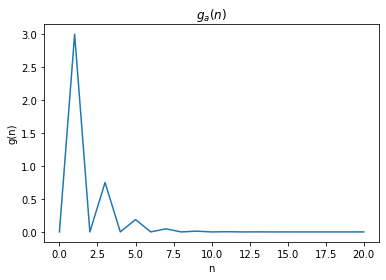

In [34]:
n = linspace(0, 20, 21)

gan = []

for i in n:
    
    gan.append((3*0.5**i)-3*(-0.5)**i)
    
plot(n, gan)
ylabel('g(n)')
xlabel('n')
title('$g_{a} (n)$')
show()

Mindkét pólus az egységkörön belül van (0.5, -0.5). Azt látjuk, hogy ez a rendszer valóban stabil lesz.

Egy rendszer egységlépcsőre adott válasza tulajdonképpen az impulzusválasz integrálja. Ez alapján:

$$y(n) = \int_0^n 3 \left(\frac{1}{2}\right)^n - 3 \left(-\frac{1}{2}\right)^n dn$$

-------------

$$G_b[z] = \frac{z}{(z - 1.5)(z − 0.5)} = \frac{z^{-1}}{(1 - 1.5z^{-1})(1 − 0.5z^{-1})} = \frac{A}{1 - 1.5z^{-1}} + \frac{B}{1 − 0.5z^{-1}} = *$$


$$A = \frac{z^{-1}}{1 − 0.5z^{-1}} \bigg|_{z^{-1} = \frac{2}{3}} = 1$$
$$B = \frac{z^{-1}}{1 − 1.5z^{-1}} \bigg|_{z^{-1} = 2} = -1$$


$$* = \frac{1}{1 - 1.5z^{-1}} - \frac{1}{1 − 0.5z^{-1}}$$

Innen $g_b[n]$:


$$g_b[n] = (1.5)^n u[n] - (0.5)^n u[n]$$

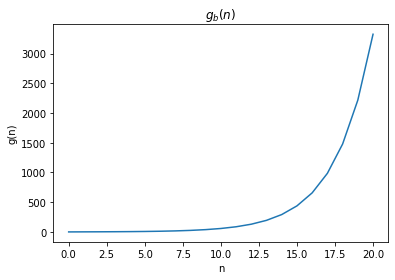

In [35]:
n = linspace(0, 20, 21)

gbn = []

for i in n:
    
    gbn.append((1.5**i)-(0.5)**i)
    
plot(n, gbn)
ylabel('g(n)')
xlabel('n')
title('$g_{b} (n)$')
show()

Itt az egyik pólus kívül van az egységkörön (1.5, 0.5), az ábrán látszik is, hogy a rendszer instabil. 

## 2. feladat

A kauzális jelsorozatok $Z$-transzformáltjára meghatározott kifejezés ellenőrzésére a `scipy.signal.lfilter()` függvényt alkalmazhatjuk.
Legyen a $x[n]$ kauzális sorozat transzformáltja az alábbi racionális kifejezés $X(z) = B(z)/A(z)$.

* Lássa be, hogy az alábbi kódrészlet az $x[n]$ első $N+1$ elemét generálja, ahol jelölje az $A(z)$ illetve a $B(z)$ polinom együtthatóinak vektorát $a$ és $b$.

```python
x = lfilter(b, a, concatenate([ones(1), zeros(N - 1)]))
```

* Határozza meg a $x[n] = \left[\left(\frac{1}{2}\right)^n + \left(-\frac{1}{3}\right)^n\right] u[n]$ sorozathoz $X(z)$-t.
* Ellenőrizze az eredményeket numerikusan.

Nézzük az előző feladat $G_a[z]$ fügvényét. Itt $A(z) = z^2 - 0.25$ és $B(z) = 3z$, tehát $a = (0, 3, 0)$ és $b = (1, 0, -0.25)$. Írjuk be ezeket az lfilter-be, $N = 20$ mellett. Mivel a "concatenate([ones(1), zeros(N - 1)])" rész lényegében az egységimpulzus, valóban azt várjuk, hogy a függvény kimenete az x[n] elemei lesznek.

In [44]:
b = [0, 3, 0]
a = [1, 0, -0.25]
N = 20

x = signal.lfilter(b, a, concatenate([ones(1), zeros(N - 1)]))

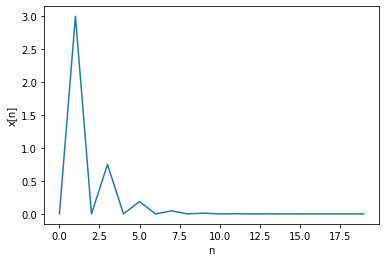

In [49]:
n = linspace(0, 19, 20)
plot(n, x)
ylabel('x[n]')
xlabel('n')
show()

Az előző feladat $g_a (n)$ ábrája és ez az ábra megegyezik, tehát a függvény kimenete valóban az x[n] elemei lesznek, viszont ebben a formában csak az első $N-1$. Esetleg a feladatban lehet elírás..?

----------

x[n]-ből egyszerűen megkaphatjuk X(z)-t:

$$X(z) = \frac{1}{1-\frac{1}{2}z^{-1}} + \frac{1}{1+\frac{1}{3}z^{-1}} = \frac{\left(1+\frac{1}{3}z^{-1}\right) + \left(1-\frac{1}{2}z^{-1}\right)}{\left(1-\frac{1}{2}z^{-1}\right) \left(1+\frac{1}{3}z^{-1}\right)} = \frac{2-\frac{1}{6}z^{-1}}{1-\frac{1}{6}z^{-1} - \frac{1}{6}z^{-2}}$$

A törtet megszorozzuk $\frac{z^2}{z^2}$-el:

$$X(z) = \frac{2z^2 - \frac{1}{6}z}{z^2 - \frac{1}{6}z-\frac{1}{6}}$$

## 3. feladat

Gondolatban építse fel ideális ellenállás, kapacitás és induktivitás segítségével az alábbi szűrőhálózatot:

<img src='rlc.png' alt='r_over_rlc'>

* Ábrázolja a hálózat Bode- és Nyquist-diagramjait!
* Mi ennek a hálózatnak az impulzusra adott válasza? (Vezesse le a hálózat differenciál egyenleteire támaszkodva.)
* Legyen a hálózat bemenetén négyszögjel. Válassza meg úgy ennek periódusidejét, hogy a hálózatra jellemző $\tau$ időállandóval
    * megyegyezzen,
    * legyen kisebb, pl $0.2\tau$
    * legyen nagyobb, pl $5\tau$.

Határozza meg a válaszfüggvényeket mind az időben mind a frekvenciatérben számolva.

A kimeneti feszültség, laplace térben ($s = i \omega$):

$$V_o (s) = V_i (s) \left(\frac{R}{r + Ls + \frac{1}{Cs}}  \right) $$

Az átviteli függvény:

$$H(s) = \frac{V_o (s)}{V_i (s)} = \frac{R}{R + Ls + \frac{1}{Cs}}$$

Szorozzuk meg 1-el úgy, hogy: $$1 = \frac{\frac{s}{L}}{\frac{s}{L}}$$

Ekkor:

$$H(s) = \frac{\frac{R}{L}s}{s^2 + \frac{R}{L}s + \frac{1}{LC}}$$

A Bode-diagram magnítúdó ábrájához vegyük $|H(i \omega)|$-t:

$$|H(i \omega)| = \frac{\frac{R}{L}\omega}{\sqrt{\left(\frac{1}{LC} - \omega^2 \right)^2 + \left(\frac{R}{L} \omega \right)^2}}$$

A fázisábrához pedig:

$$\theta (i \omega) = \frac{\pi}{2} - arctg \left(\frac{\frac{R}{L} \omega}{\frac{1}{LC}- \omega^2}  \right)$$

In [69]:
def H(w, R, L, C):
    
    return(((R*w)/L)/(sqrt(((1/(L*C)) - w**2)**2 + ((R*w)/L)**2)))

In [219]:
def Theta(w, R, L, C):
    
    return(pi/2 - arctan(((R*w)/L)/((1/(L*C))-w**2)))

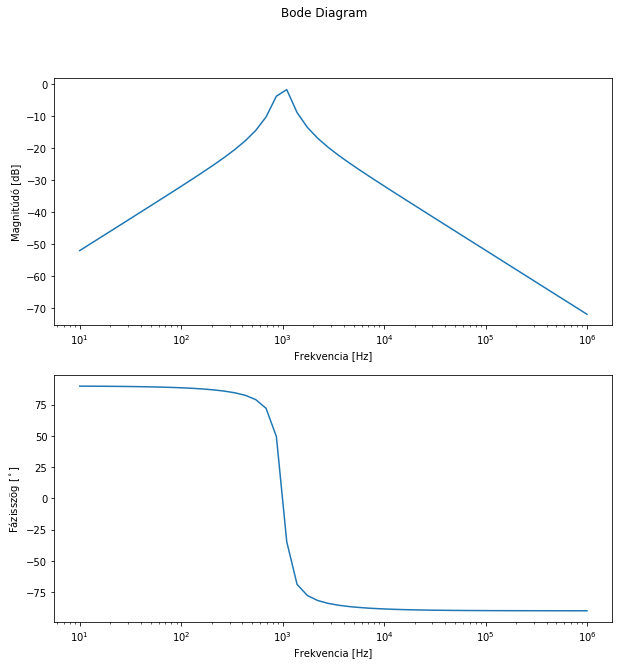

In [257]:
hVals = []
tVals = []

R = 1600
L = 1
C = 0.000000025

f = logspace(1,6)

hVals = 20*log10(H(2*pi*f, R, L, C))
tVals = 57.2957795*Theta(2*pi*f, R, L, C)

for i in range(len(tVals)):
    
    if tVals[i] > tVals[i-1]:
        
        tVals[i] = tVals[i]-180
    
fig, axs = plt.subplots(2, figsize=(10,10))
fig.suptitle('Bode Diagram')

axs[0].plot(f, hVals)
axs[0].set_xscale('log')
axs[0].set_xlabel('Frekvencia [Hz]')
axs[0].set_ylabel('Magnitúdó [dB]')

axs[1].plot(f, tVals)
axs[1].set_xscale('log')
axs[1].set_xlabel('Frekvencia [Hz]')
axs[1].set_ylabel('Fázisszög [$^\circ$]')

pylab.show()

-------------

https://electronics.stackexchange.com/questions/318293/impulse-response-of-a-series-rlc-circuit

A huroktörvény és az Ohm törvény alapján: 

$$V_i = i(t)R + L \frac{d}{dt} i(t) + v_C (t)$$

Kezdeti értékek:

$$i(0^-) = 0, \text{ } v_C (0^-) = 0$$

Mivel soros körünk van, így: $i(t) = i_R (t) = i_L (t) = i_C (t)$

$$i(t) = C \frac{d}{dt} V_C (t)$$

Innen:

$$V_i = RC \frac{d}{dt} V_C (t) + LC \frac{d^2}{dt^2} V_C (t) + V_C (t)$$

Vegyük a Laplace-transzformáltat (Az egységimpulzus L-transzformáltja 1):

$$1 = V_C (s) \left(RCs + LCs^2 + 1\right)$$

$$V_C (s) = \frac{1}{s^2 + \frac{R}{L}s + \frac{1}{LC}}$$

Átalakítva:

$$V_C (s) = \frac{1}{\left(s + \frac{R}{2L} \right)^2 + \left(\frac{1}{LC} - \frac{R^2}{4L^2} \right)}$$

Invertáljuk $V_C (s)$-t:

$$v_C (t) = \frac{1}{\sqrt{\frac{1}{LC} - \frac{R^2}{4L^2}}} e^{-\frac{R}{2L}t} sin \left(\sqrt{\frac{1}{LC} - \frac{R^2}{4L^2}} t \right)$$

Innen megkaphatjuk az áramot:

$$i(t) = C \frac{d}{dt} v_C (t) = - \frac{C}{\sqrt{\frac{1}{LC} - \frac{R^2}{4L^2}}} e^{-\frac{R}{2L}t} \left(\frac{R}{2L} sin \left(\sqrt{\frac{1}{LC} - \frac{R^2}{4L^2}} t \right) -  \frac{1}{\sqrt{\frac{1}{LC} - \frac{R^2}{4L^2}}} cos \left(\sqrt{\frac{1}{LC} - \frac{R^2}{4L^2}} t \right) \right)$$

Az ellenálláson eső (kimeneti) feszültség:

$$v_R (t) = i(t) R =  - \frac{RC}{\sqrt{\frac{1}{LC} - \frac{R^2}{4L^2}}} e^{-\frac{R}{2L}t} \left(\frac{R}{2L} sin \left(\sqrt{\frac{1}{LC} - \frac{R^2}{4L^2}} t \right) -  \frac{1}{\sqrt{\frac{1}{LC} - \frac{R^2}{4L^2}}} cos \left(\sqrt{\frac{1}{LC} - \frac{R^2}{4L^2}} t \right) \right)$$

Ez lesz a keresett impulzus válasz.


In [244]:
def v(t, R, L, C):
    
    return(-((R*C)/(sqrt(1/(L*C) - (R**2)/(4*L**2))))*exp(-(R*t)/(2*L))*((R/(2*L))*sin(sqrt(1/(L*C) - (R**2)/(4*L**2))*t)-((1)/(sqrt(1/(L*C) - (R**2)/(4*L**2))))*cos(sqrt(1/(L*C) - (R**2)/(4*L**2))*t)))

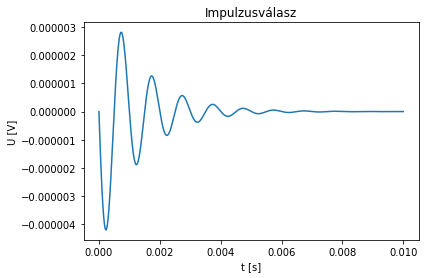

In [258]:
tVals = linspace(0, 0.01, 100000)
vVals = v(tVals, R, L, C)

plot(tVals, vVals)
xlabel('t [s]')
ylabel('U [V]')
title("Impulzusválasz")
show()

----------

A négyszögjel Laplace-transzformáltja:

$$F(s) = \frac{A}{s} tanh \left(\frac{sT}{4}  \right)$$

A kimenet:

$$Y(s) = F(s)H(s) = \frac{\frac{R}{L}s \cdot \frac{A}{s} tanh \left(\frac{sT}{4}  \right)}{s^2 + \frac{R}{L}s + \frac{1}{LC}} = \frac{\frac{RA}{L} \cdot  tanh \left(\frac{sT}{4}  \right)}{s^2 + \frac{R}{L}s + \frac{1}{LC}}$$

## 4. feladat

Bár a könyvtári függvénykészletben adott, mégis érdemes elkészíteni a saját konvolúció illetve a keresztkorrelációt számoló függvényeinket. Alkalmazza a saját implementációjú függvényeinket és a könyvtárilag adott függvényeket egy arra alkalmas jelre. Vesse össze a két megvalósítás eredményét.

In [432]:
def convolve_own(a, b):
    
    size = b.shape[0]
    m = size/2     
    zeros = np.zeros((int(m)))       
    stacked = np.hstack([zeros,a,zeros]) 

    temp = []
    A = [] 
    
    for n in range(len(a)):
        
        Ac = stacked[n:n+size]
        A.append(Ac)
        temp.append(list(Ac*b[::-1]))
        
    temp = np.array(temp)
    out = temp.sum(1)
    
    return(out)

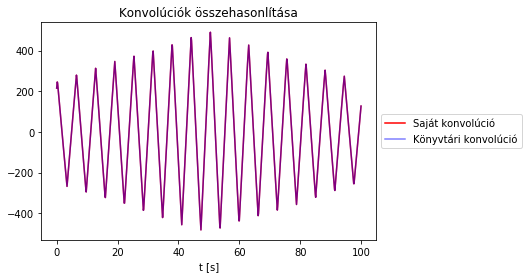

In [436]:
t = linspace(0, 100, 1001)

s1 = signal.sawtooth(t)
s2 = signal.square(t)

sajat = convolve_own(s1, s2)
beepitett = convolve(s1, s2, mode='same')

plot(t, sajat, 'r-', label = "Saját konvolúció")
plot(t, beepitett, 'b-' ,label = "Könyvtári konvolúció", alpha=0.5)
xlabel('t [s]')
title('Konvolúciók összehasonlítása')
legend(loc='center left', bbox_to_anchor=(1, 0.5))
show()

A saját és a beépített konvolúció lényegében megegyezik.


-------

In [462]:
def dot(a, b, start, stop, delay):
 
    out = 0
    
    for n in range(start, stop):
        
        out += a[n + delay] * b[n]
        
    return out

def correlate_own(a, b):

    size = len(a)

    c = [0] * size  
    
    for index in range(size):
        
        delay = index - size // 2
        
        if delay < 0:
            
            c[index] = dot(a, b, -delay, size, delay)
            
        else:
            
            c[index] = dot(a, b, 0, size-delay, delay)

    return c

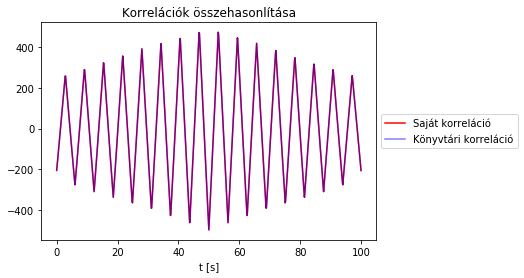

In [463]:
sajat_corr = correlate_own(s1, s2)
beepitett_corr = correlate(s1, s2, mode = 'same')

plot(t, sajat_corr, 'r-', label = "Saját korreláció")
plot(t, beepitett_corr, 'b-' ,label = "Könyvtári korreláció", alpha=0.5)
xlabel('t [s]')
title('Korrelációk összehasonlítása')
legend(loc='center left', bbox_to_anchor=(1, 0.5))
show()

A korrelációk itt is megegyeznek, a saját implementáció lassabban fut le.


## 5. feladat

Határozza meg analitikus számolással az $f(x) = A\sin(\omega x + \phi)$ függvény autokorrelációs függvényét. Közelítse $f(x)$ időfüggvényt $f[n]$ egyenletesen mintavételezett sorozattal, és ellenőrizze
az eredményt numerikusan. 

* Generáljon a `randn()` függvény segítségével zajt és vizsgálja meg annak spektrumát. 
* Keverje az eredeti jelhez ezt a zajt, és próbálja megbecsülni az eredeti jel periódusát.

$$R(\tau) = \lim_{T \rightarrow \infty } \frac{1}{T} \int_{\frac{-T}{2}}^{\frac{T}{2}} A sin(\omega x + \phi)A sin(\omega (x-\tau) + \phi) dt = \lim_{T \rightarrow \infty } \frac{A^2}{T} \int_{\frac{-T}{2}}^{\frac{T}{2}} sin(\omega x + \phi)sin(\omega x - \omega \tau + \phi) dt$$

Felhasználjuk a következő trigonometrikus azonosságot: $sin(x)sin(y) = \frac{cos(x-y) - cos(x + y)}{2}$

$$R(\tau) = \lim_{T \rightarrow \infty } \frac{A^2}{2T} \int_{\frac{-T}{2}}^{\frac{T}{2}} cos(\omega \tau) - cos (2 \omega x + 2 \phi - \omega \tau) dt$$

Tudjuk, hogy $ \int_{- \frac{T}{2}}^{\frac{T}{2}} cos(x) = 0$, illetve mivel $t$ szerint integrálunk, $cos(\omega \tau)$ konstans:

$$R(\tau) = \lim_{T \rightarrow \infty } \frac{A^2}{2T} cos(\omega \tau) \int_{\frac{-T}{2}}^{\frac{T}{2}} 1 dt = \lim_{T \rightarrow \infty } \frac{A^2}{2T} cos(\omega \tau) T $$

T-vel tudunk egyszerűsíteni, innentől a határértéket elhagyhatjuk, tehát:

$$R(\tau) = \frac{A^2}{2} cos(\omega \tau)$$

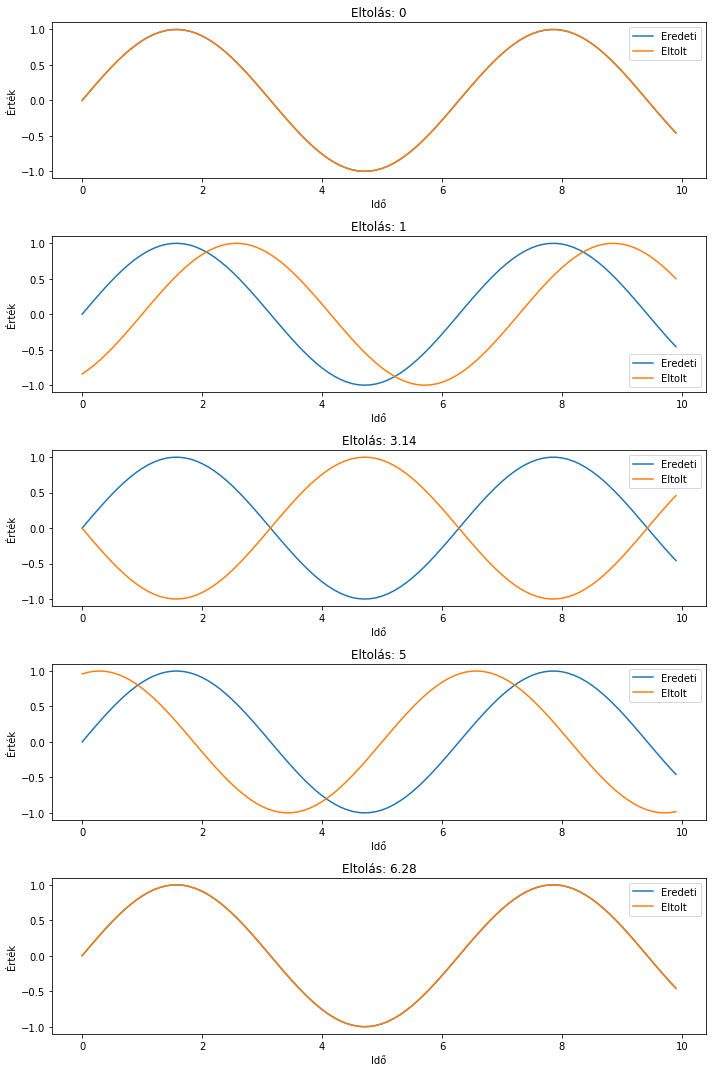

In [529]:
laglist = [0, 1, 3.14, 5, 6.28]

fig, axs = plt.subplots(5, figsize=(10,15))

time = np.arange(0, 10, 0.1)

A = 1
w = 1

for i, j in enumerate(laglist):


    orig = A*sin(w*time)
    lagged = A*sin(w*(time-j))

    axs[i].plot(time, orig, label = 'Eredeti')
    axs[i].plot(time, lagged, label = 'Eltolt')
    axs[i].set_xlabel('Idő')
    axs[i].set_ylabel('Érték')
    axs[i].set_title('Eltolás: ' + str(j))
    axs[i].legend()

fig.tight_layout()    
pylab.show()

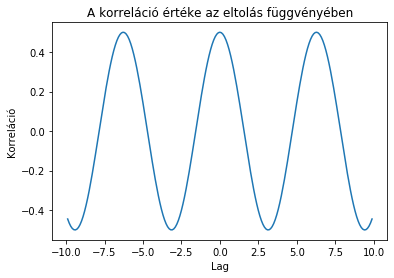

In [531]:
tau = np.arange(-time[-1],time[-1]+0.1,0.1)
corr = (A**2/2)*cos(w*tau)

plot(tau, corr)
xlabel('Lag')
ylabel('Korreláció')
title('A korreláció értéke az eltolás függvényében')
show()

Az eredmény az amit vártunk: Az eltolás függvényében úgy változik a korreláció, hogy a félperiódusnál ellentétes, de ugyan akkora értékű a korreláció, míg a teljes periódusnál a korreláció maximális értékű. Az eltolt ábrákon is látszik, hogy periódusonként a függvény gyakorlatilag megegyezik.

-----


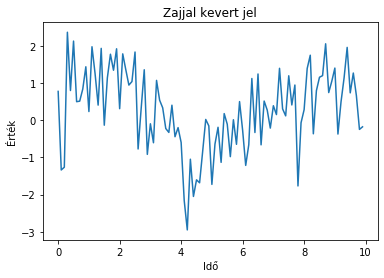

In [540]:
jel = A*sin(w*time)
zaj = random.randn(len(jel))
kevert = jel + zaj

plot(time, kevert)
xlabel('Idő')
ylabel('Érték')
title('Zajjal kevert jel')
show()

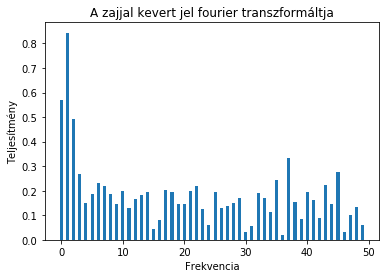

In [560]:
fourier = fft(kevert)
n = len(kevert)
freq = fftfreq(n, 1/len(jel))[:n//2]
bar(freq, 2.0/n * np.abs(fourier[0:n//2]), width = 0.5)
xlabel("Frekvencia")
ylabel("Teljesítmény")
title("A zajjal kevert jel fourier transzformáltja")
show()


A fourier transzformáció után látszik, hogy a frekvencia-lista második eleme a domináns.

Visszakaptuk az eredetileg beállított $\omega = 1$ frekvenciát, ami az eredeti jel frekvenciája, ahonnan a periódus $\sim 6.28$ s.